In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection,feature_extraction,tree,metrics,ensemble
import seaborn as sns

In [70]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [71]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [72]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

In [73]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [75]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [76]:
df = df.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [78]:
df.median_house_value = np.log1p(df.median_house_value.values)

In [79]:
df_train_full, df_test = model_selection.train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = model_selection.train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_full = df_train_full.median_house_value.values
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [80]:
dv = feature_extraction.DictVectorizer(sparse=True)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [83]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [88]:
dt = tree.DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
# y_pred = dt.predict(X_val)
# print(round(metrics.mean_squared_error(y_val, y_pred,squared=False),3))
print(tree.export_text(dt,feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [90]:
rf = ensemble.RandomForestRegressor(n_estimators=10,random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print(round(metrics.mean_squared_error(y_val, y_pred_rf , squared=False),3))

0.245


In [ ]:
n_estimator = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
scores =[]
for n in n_estimator:
    random = ensemble.RandomForestRegressor(n_estimators=n,random_state=1,n_jobs=-1)
    random.fit(X_train, y_train)
    y_pred_rf = random.predict(X_val)
    scores.append((n,metrics.mean_squared_error(y_val, y_pred_rf , squared=False)))
    # print(n , metrics.mean_squared_error(y_val, y_pred_rf , squared=False))

In [122]:
df_scores = pd.DataFrame(scores, columns=['n_estimator','RMSE'])
df_scores.round(4).sort_values(by='RMSE').head(10)

,n_estimator,RMSE
16,170,0.2334
15,160,0.2335
17,180,0.2336
14,150,0.2336
19,200,0.2337
13,140,0.2337
18,190,0.2338
12,130,0.2339
11,120,0.2341
10,110,0.2343


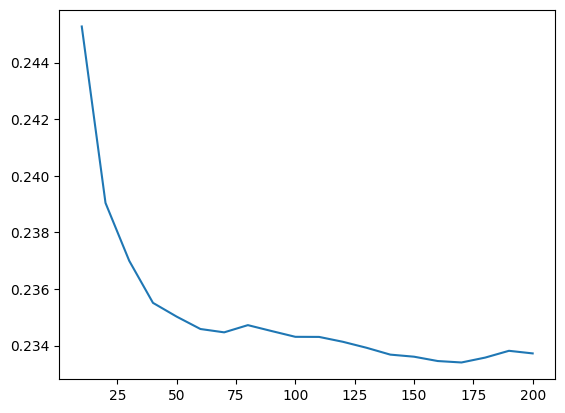

In [109]:
plt.plot(df_scores.n_estimator,df_scores.RMSE)

In [ ]:
max_depth = [10, 15, 20, 25]
all_scores =[]
for m in max_depth:
    for n in n_estimator:
        random = ensemble.RandomForestRegressor(n_estimators=n,max_depth=m,random_state=1,n_jobs=-1)
        random.fit(X_train, y_train)
        y_pred_rf = random.predict(X_val)
        all_scores.append((m,n,metrics.mean_squared_error(y_val, y_pred_rf , squared=False)))
        # print("max_depth",m,"n_estimator", n , metrics.mean_squared_error(y_val, y_pred_rf , squared=False))

In [106]:
df_all_scores = pd.DataFrame(all_scores, columns=['max_depth','n_estimator','RMSE',3])
df_all_scores.round(4).sort_values(by='RMSE')

,max_depth,n_estimator,RMSE,3
76,25,170,0.2334,3
75,25,160,0.2334,3
74,25,150,0.2335,3
77,25,180,0.2336,3
73,25,140,0.2336,3
...,...,...,...,...
4,10,50,0.2456,3
20,15,10,0.2458,3
2,10,30,0.2464,3
1,10,20,0.2477,3


In [107]:
df_all_scores_pivot = df_all_scores.pivot(index='max_depth', columns=['n_estimator'],values=['RMSE'])
df_all_scores_pivot.round(4)

RMSE                                                          \
n_estimator     10      20      30      40      50      60      70      80    
max_depth                                                                     
10           0.2507  0.2477  0.2464  0.2452  0.2456  0.2454  0.2454  0.2456   
15           0.2458  0.2396  0.2377  0.2359  0.2360  0.2357  0.2355  0.2357   
20           0.2447  0.2386  0.2367  0.2353  0.2350  0.2347  0.2346  0.2349   
25           0.2443  0.2382  0.2362  0.2349  0.2344  0.2340  0.2340  0.2342   

                                                                             \
n_estimator     90      100     110     120     130     140     150     160   
max_depth                                                                     
10           0.2455  0.2454  0.2453  0.2451  0.2449  0.2446  0.2446  0.2445   
15           0.2354  0.2354  0.2352  0.2350  0.2348  0.2346  0.2345  0.2343   
20           0.2348  0.2346  0.2344  0.2342  0.2340  0.2338  0.2338  0.2337   
25           0.2342  0.2343  0.2342  0.2340  0.2339  0.2336  0.2335  0.2334   

                                             
n_estimator     170     180     190     200  
max_depth                                    
10           0.2445  0.2446  0.2448  0.2448  
15           0.2343  0.2345  0.2347  0.2346  
20           0.2337  0.2339  0.2341  0.2339  
25           0.2334  0.2336  0.2338  0.2337

<Axes: xlabel='None-n_estimator', ylabel='max_depth'>

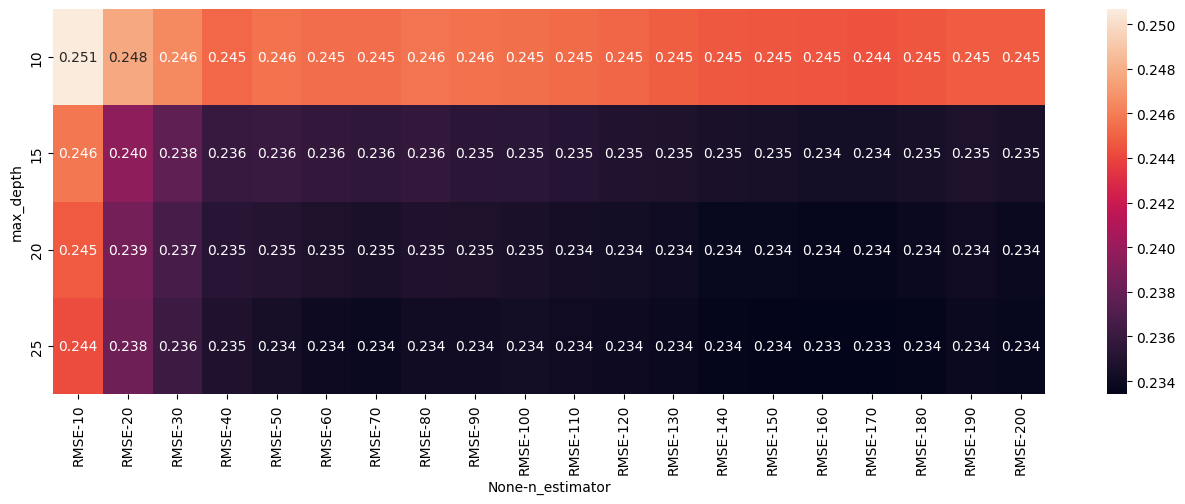

In [110]:
plt.figure(figsize = (16,5))
sns.heatmap(df_all_scores_pivot,annot=True,fmt='.3f')

In [121]:
# np.mean(df_all_scores[df_all_scores['max_depth'] == 25]['RMSE'])


In [128]:
rf = ensemble.RandomForestRegressor(n_estimators=10,max_depth=20,random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': dv.get_feature_names_out(), 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
4,median_income,0.335611
5,ocean_proximity=<1H OCEAN,0.292473
2,latitude,0.102007
3,longitude,0.086244
6,ocean_proximity=INLAND,0.073806
1,housing_median_age,0.030317
7,population,0.027136
9,total_rooms,0.021417
8,total_bedrooms,0.015852
0,households,0.015136


In [129]:
import xgboost as xgb

In [142]:
features = []
for f in dv.feature_names_:
	string = f.replace("=<", "-le")
	features.append(string)

dtrain = xgb.DMatrix(X_train, label= y_train , feature_names = features)
dval = xgb.DMatrix(X_val, label= y_val , feature_names = features)

In [146]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [151]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
xgb_model = xgb.train(xgb_params,dtrain,verbose_eval=5,evals=watchlist,num_boost_round=100)
y_pred = xgb_model.predict(dval)
metrics.mean_squared_error(y_val, y_pred , squared=False)

[0]	train-rmse:0.44350	val-rmse:0.44250
[5]	train-rmse:0.25338	val-rmse:0.27463
[10]	train-rmse:0.21444	val-rmse:0.25179
[15]	train-rmse:0.19858	val-rmse:0.24522
[20]	train-rmse:0.18524	val-rmse:0.23978
[25]	train-rmse:0.17757	val-rmse:0.23830
[30]	train-rmse:0.16888	val-rmse:0.23570
[35]	train-rmse:0.16113	val-rmse:0.23416
[40]	train-rmse:0.15542	val-rmse:0.23318
[45]	train-rmse:0.14941	val-rmse:0.23190
[50]	train-rmse:0.14536	val-rmse:0.23225
[55]	train-rmse:0.14150	val-rmse:0.23197
[60]	train-rmse:0.13719	val-rmse:0.23139
[65]	train-rmse:0.13259	val-rmse:0.23158
[70]	train-rmse:0.12943	val-rmse:0.23068
[75]	train-rmse:0.12555	val-rmse:0.23039
[80]	train-rmse:0.12192	val-rmse:0.22886
[85]	train-rmse:0.11854	val-rmse:0.22888
[90]	train-rmse:0.11496	val-rmse:0.22861
[95]	train-rmse:0.11211	val-rmse:0.22908
[99]	train-rmse:0.10989	val-rmse:0.22862


0.228623199980106

In [152]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
xgb_model = xgb.train(xgb_params,dtrain,verbose_eval=5,evals=watchlist,num_boost_round=100)
y_pred = xgb_model.predict(dval)
metrics.mean_squared_error(y_val, y_pred , squared=False)

[0]	train-rmse:0.52449	val-rmse:0.52045
[5]	train-rmse:0.37822	val-rmse:0.38151
[10]	train-rmse:0.30326	val-rmse:0.31427
[15]	train-rmse:0.26538	val-rmse:0.28380
[20]	train-rmse:0.24512	val-rmse:0.26882
[25]	train-rmse:0.23026	val-rmse:0.25997
[30]	train-rmse:0.21887	val-rmse:0.25266
[35]	train-rmse:0.21020	val-rmse:0.24826
[40]	train-rmse:0.20392	val-rmse:0.24539
[45]	train-rmse:0.19814	val-rmse:0.24293
[50]	train-rmse:0.19215	val-rmse:0.24020
[55]	train-rmse:0.18809	val-rmse:0.23878
[60]	train-rmse:0.18457	val-rmse:0.23791
[65]	train-rmse:0.18063	val-rmse:0.23698
[70]	train-rmse:0.17741	val-rmse:0.23622
[75]	train-rmse:0.17468	val-rmse:0.23510
[80]	train-rmse:0.17242	val-rmse:0.23453
[85]	train-rmse:0.17014	val-rmse:0.23404
[90]	train-rmse:0.16797	val-rmse:0.23332
[95]	train-rmse:0.16562	val-rmse:0.23276
[99]	train-rmse:0.16323	val-rmse:0.23209


0.23208927121609343